In [178]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv'

Boston = pd.read_csv(url)

In [179]:
Boston['logCrim'] =  np.log( Boston['crim'] )

Y = Boston['logCrim']

X = Boston['dis']

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3 , random_state=123)

In [181]:
from pygam import LinearGAM, GAM, s, f

In [182]:
gam_1 = GAM(s(0, n_splines=4, spline_order=3 , penalties='none' )).fit(X_train, Y_train)

# n_splines = k + spline_order = nº de betas (sin contar beta0)
# k + 1 = nº intervalos = n_splines - spline_order + 1 = 4 - 3 + 1 = 2 (en este caso)
# Los intervalos que supongo que se usan son:  [Q0, Q25),[Q25, Q50),[Q50, Q75),[Q75,Q100)

In [183]:
gam_1.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                         4.0
Link Function:                     IdentityLink Log Likelihood:                                  -660.1278
Number of Samples:                          354 AIC:                                             1330.2555
                                                AICc:                                             1330.428
                                                GCV:                                                2.0564
                                                Scale:                                              2.0147
                                                Pseudo R-Squared:                                   0.5516
Feature Function                  Lam

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17548\326973348.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_1.summary()


In [184]:
import matplotlib.pyplot as plt

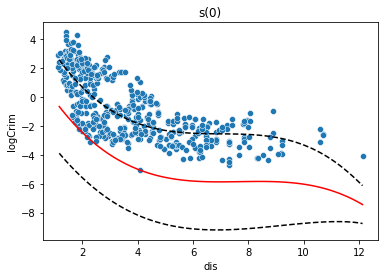

In [185]:
for i, term in enumerate(gam_1.terms):
    if term.isintercept:
        continue

    XX = gam_1.generate_X_grid(term=i)
    pdep, confi = gam_1.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [186]:
ECM_test_GAM_1 = sum(( Y_test - gam_1.predict(X_test) )**2) / len(Y_test)

In [187]:
ECM_test_GAM_1

2.0835966012179585

In [188]:
gam_1_penalizado = GAM(s(0, n_splines=4, spline_order=3 , lam=0.6 )).fit(X_train, Y_train)

In [189]:
gam_1_penalizado.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.1451
Link Function:                     IdentityLink Log Likelihood:                                  -711.2983
Number of Samples:                          354 AIC:                                             1428.8868
                                                AICc:                                            1428.9613
                                                GCV:                                                2.4505
                                                Scale:                                              2.4238
                                                Pseudo R-Squared:                                   0.4577
Feature Function                  Lam

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17548\4201017806.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_1_penalizado.summary()


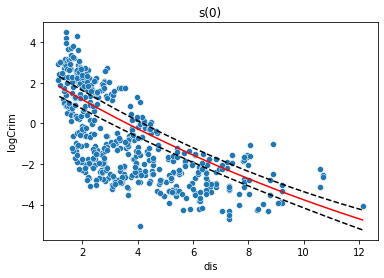

In [190]:
for i, term in enumerate(gam_1_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_1_penalizado.generate_X_grid(term=i)
    pdep, confi = gam_1_penalizado.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [191]:
ECM_test_GAM_1_penalizado = sum(( Y_test - gam_1_penalizado.predict(X_test) )**2) / len(Y_test)

In [192]:
ECM_test_GAM_1_penalizado

2.3755932909152495

In [193]:
gam_2 = GAM(s(0, n_splines=6, spline_order=3 , penalties='none')).fit(X_train, Y_train)

# n_splines = k + spline_order = nº de betas (sin contar beta0)
# k + 1 = nº intervalos = n_splines - spline_order + 1 = 6 - 3 + 1 = 4 (en este caso)
# Los intervalos que supongo que se usan son:  [Q0, Q25),[Q25, Q50),[Q50, Q75),[Q75,Q100)

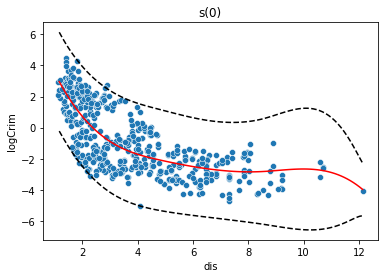

In [194]:
for i, term in enumerate(gam_2.terms):
    if term.isintercept:
        continue

    XX = gam_2.generate_X_grid(term=i)
    pdep, confi = gam_2.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [195]:
ECM_test_GAM_2 = sum(( Y_test - gam_2.predict(X_test) )**2) / len(Y_test)

In [196]:
ECM_test_GAM_2

2.0582018952364134

In [197]:
gam_2_penalizado = GAM(s(0, n_splines=6, spline_order=3 , lam=0.6 )).fit(X_train, Y_train)


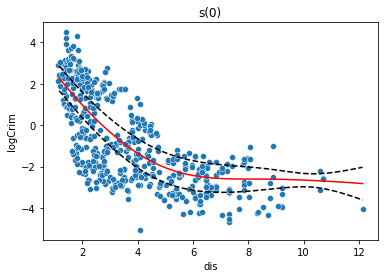

In [198]:
for i, term in enumerate(gam_2_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_2_penalizado.generate_X_grid(term=i)
    pdep, confi = gam_2_penalizado.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [199]:
ECM_test_GAM_2_penalizado = sum(( Y_test - gam_2_penalizado.predict(X_test) )**2) / len(Y_test)

In [200]:
ECM_test_GAM_2_penalizado

2.0803886687764868